# Introduction: Testing Feature Selector

In this notebook we will test the feature selector using two additional datasets. We will try out many of the `FeatureSelector` methods on these standard machine learning sets to make sure that it is a minimum working product.

https://github.com/WillKoehrsen/feature-selector

In [1]:
from feature_selector import FeatureSelector

import pandas as pd

# Air Quality Dataset 

Regression machine learning task

From UCI repository: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

In [5]:
air_quality = pd.read_csv('data/AirQualityUCI.csv')
air_quality['Date'] = pd.to_datetime(air_quality['Date'])
air_quality['Date'] = (air_quality['Date'] - air_quality['Date'].min()).dt.total_seconds()
air_quality['Time'] = [int(x[:2]) for x in air_quality['Time']]
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,23587200.0,18,2,6,1360,150,11,9,1046,166,1056,113,1692,1268,13
1,23587200.0,19,2,1292,112,9,4,955,103,1174,92,1559,972,13,3
2,23587200.0,20,2,2,1402,88,9,0,939,131,1140,114,1555,1074,11
3,23587200.0,21,2,2,1376,80,9,2,948,172,1092,122,1584,1203,11
4,23587200.0,22,1,6,1272,51,6,5,836,131,1205,116,1490,1110,11


In [6]:
labels = air_quality['PT08.S5(O3)']
air_quality = air_quality.drop(columns = 'PT08.S5(O3)')

In [7]:
fs = FeatureSelector(data = air_quality, labels = labels)

In [8]:
fs.identify_all(selection_params = {'missing_threshold': 0.5, 'correlation_threshold': 0.7, 
                                    'task': 'regression', 'eval_metric': 'l2', 
                                     'cumulative_importance': 0.9})

0 features with greater than 0.50 missing values.

0 features with a single unique value.

8 features with a correlation magnitude greater than 0.70.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1369.14	valid_0's l2: 1369.14
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1021.89	valid_0's l2: 1021.89
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[986]	valid_0's l2: 1082.07	valid_0's l2: 1082.07
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1243.45	valid_0's l2: 1243.45
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 955.6	valid_0's l2: 955.6
Training un

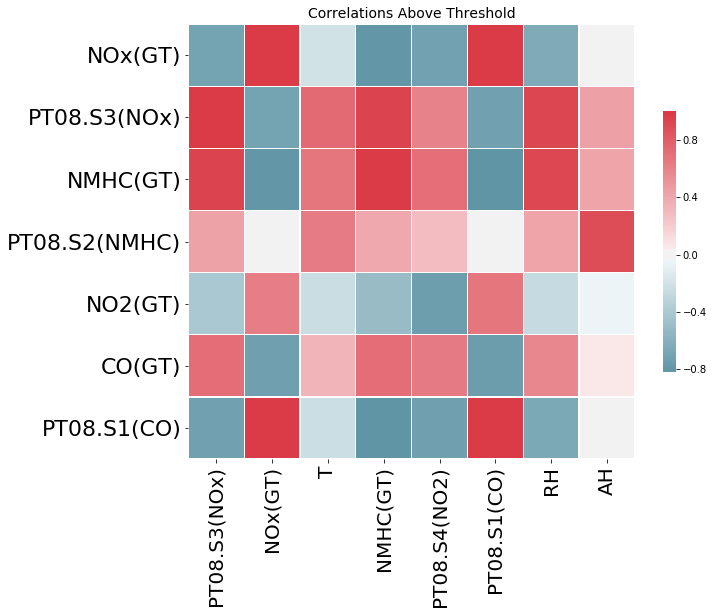

In [9]:
fs.plot_collinear()

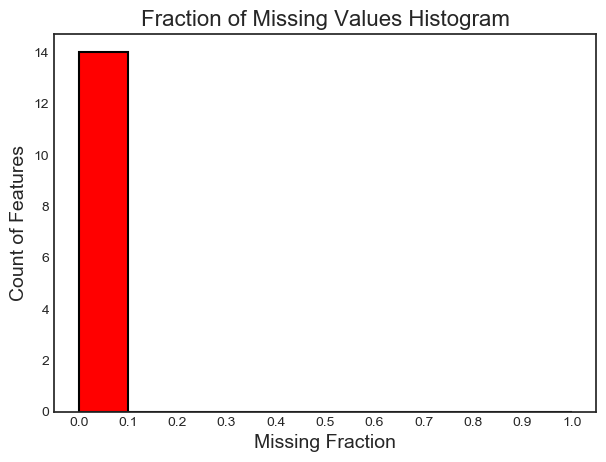

In [10]:
fs.plot_missing()

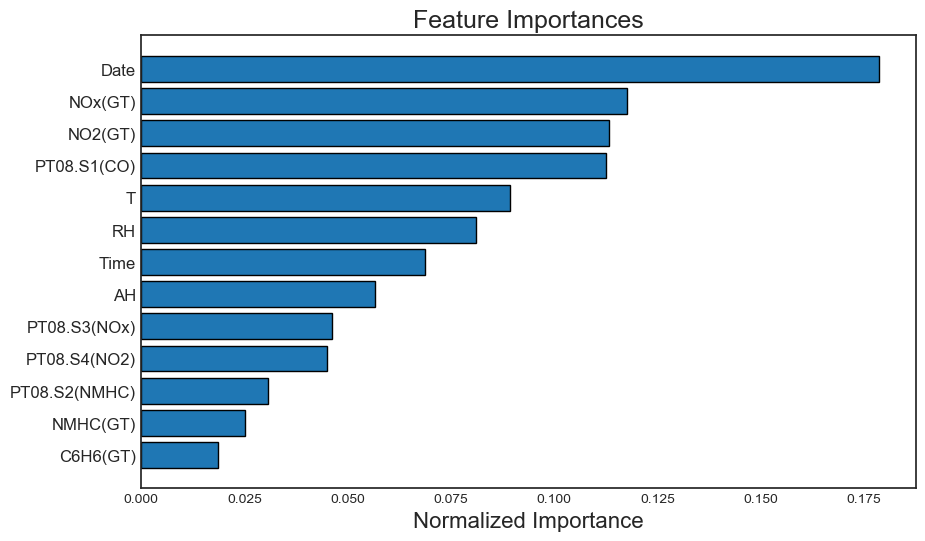

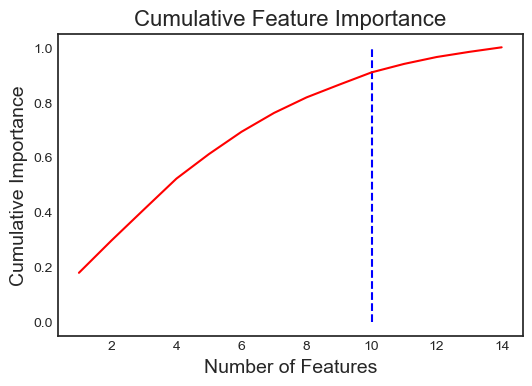

10 features required for 0.90 of cumulative importance


In [11]:
fs.plot_feature_importances(threshold = 0.9)

In [12]:
fs.data_all.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH
0,23587200.0,18,2,6,1360,150,11,9,1046,166,1056,1692,1268,13
1,23587200.0,19,2,1292,112,9,4,955,103,1174,92,972,13,3
2,23587200.0,20,2,2,1402,88,9,0,939,131,1140,1555,1074,11
3,23587200.0,21,2,2,1376,80,9,2,948,172,1092,1584,1203,11
4,23587200.0,22,1,6,1272,51,6,5,836,131,1205,1490,1110,11


In [13]:
air_quality_removed = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 11 features including one-hot features.


In [14]:
fs.ops

{'missing': [],
 'single_unique': [],
 'collinear': ['PT08.S1(CO)',
  'NMHC(GT)',
  'NOx(GT)',
  'PT08.S3(NOx)',
  'PT08.S4(NO2)',
  'T',
  'RH',
  'AH'],
 'zero_importance': [],
 'low_importance': ['PT08.S4(NO2)',
  'PT08.S2(NMHC)',
  'NMHC(GT)',
  'C6H6(GT)',
  'CO(GT)']}

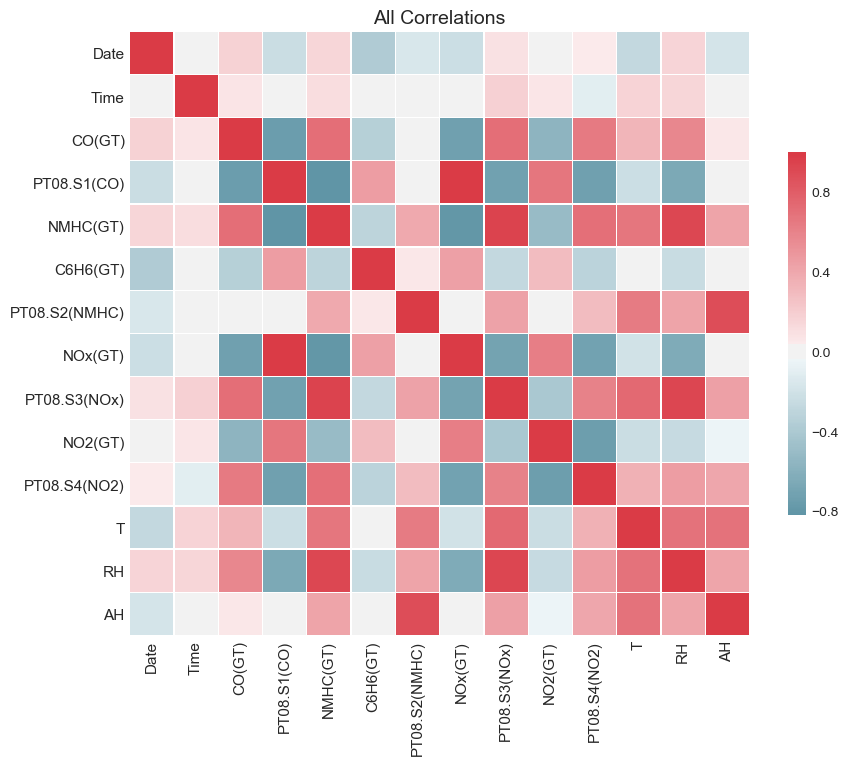

In [15]:
fs.plot_collinear(plot_all=True)

# Insurance Dataset

Classification machine learning problem.

Formatted data from Kaggle: https://www.kaggle.com/uciml/caravan-insurance-challenge/data
Originally from UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29

In [16]:
insurance = pd.read_csv('data/caravan-insurance-challenge.csv')
insurance = insurance[insurance['ORIGIN'] == 'train']
labels = insurance['CARAVAN']
insurance = insurance.drop(columns = ['ORIGIN', 'CARAVAN'])
insurance.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [14]:
fs = FeatureSelector(data = insurance, labels = labels)

In [15]:
fs.identify_all(selection_params = {'missing_threshold': 0.8, 'correlation_threshold': 0.85, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.8})


0 features with greater than 0.80 missing values.

0 features with a single unique value.

25 features with a correlation magnitude greater than 0.85.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[28]	valid_0's auc: 0.75467
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.769954
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[143]	valid_0's auc: 0.76511
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[116]	valid_0's auc: 0.734454
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[71]	valid_0's auc: 0.771283
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.80611
Training until validation scores don't improve for 10

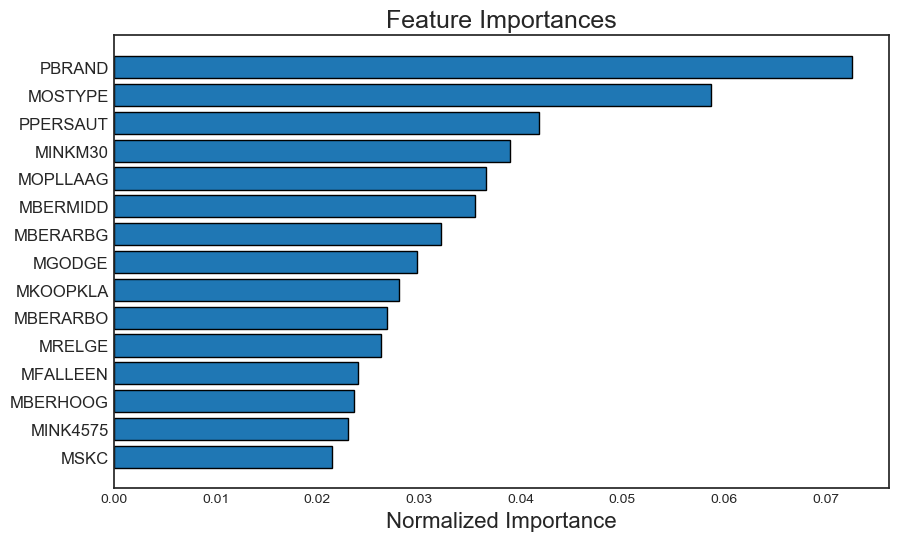

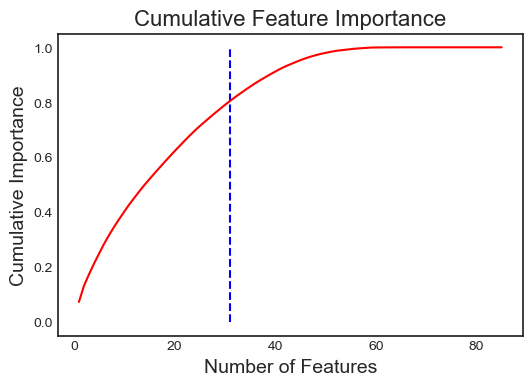

31 features required for 0.80 of cumulative importance


In [16]:
fs.plot_feature_importances(threshold=0.8)

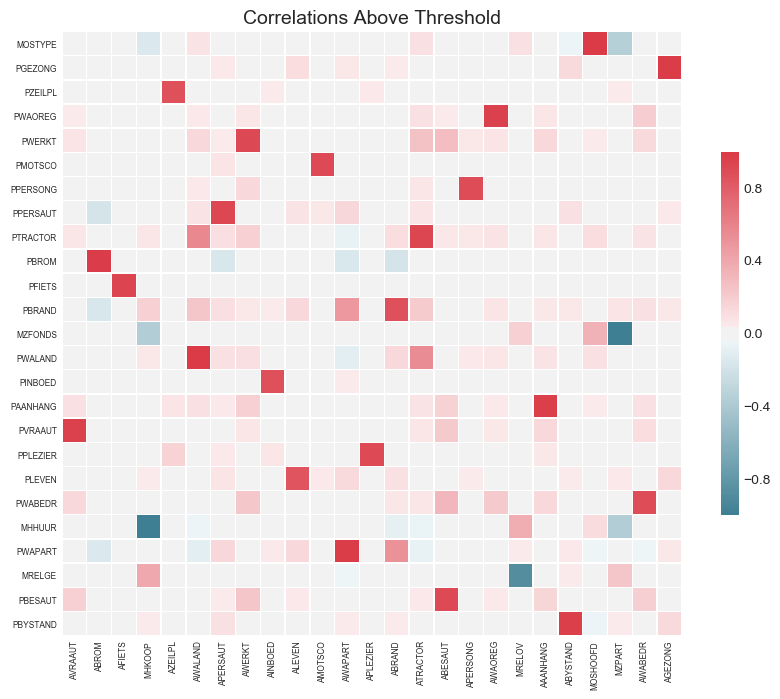

In [17]:
fs.plot_collinear()

In [18]:
insurance_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 19 features.


In [19]:
to_remove = fs.check_removal()
fs.feature_importances.head()

Total of 55 features identified for removal
55


In [20]:
insurance_removed = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 55 features including one-hot features.


,feature,importance,normalized_importance,cumulative_importance
0,PBRAND,143.9,0.072567,0.072567
1,MOSTYPE,116.4,0.058699,0.131266
2,PPERSAUT,83.0,0.041856,0.173122
3,MINKM30,77.3,0.038981,0.212103
4,MOPLLAAG,72.6,0.036611,0.248714


# Conclusions

More testing is needed and the `FeatureSelector` cannot currently handle datetimes. Nonetheless, this is a good start with decent results!